             매출액    영업이익   당기순이익
날짜                              
2016.12  2018667  292407  227261
2017.12  2395754  536450  421867
2018.12  2437714  588867  443449
2019.12  2314591  271918  219629


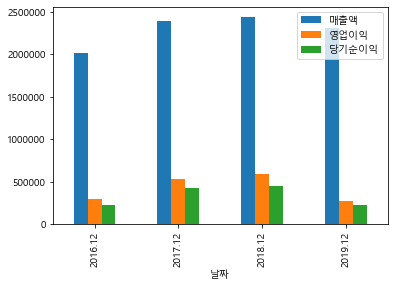

In [2]:
import requests
from matplotlib import font_manager, rc
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

URL = "https://finance.naver.com/item/main.nhn?code=005930"

samsung = requests.get(URL)
html = samsung.text

soup = BeautifulSoup(html, 'html.parser')

financeHtml = soup.select('div.section.cop_analysis div.sub_section')[0]

th_data = [item.get_text().strip() for item in financeHtml.select('thead th')]
annualDate = th_data[3:7]
quarterDate = th_data[7:13]

financeIndex = [item.get_text().strip() for item in financeHtml.select('th.h_th2')][3:]
financeIndex = financeIndex[0 : 3]
financeData = [item.get_text().strip() for item in financeHtml.select('td')]
financeData = financeData[0: 30]

dataSet = []

for i in range(len(financeData)) :
    financeData[i] = financeData[i].replace(",", "")

for i in range(4) :
    dataSet.append(financeData[i])
    dataSet.append(financeData[i + 10])
    dataSet.append(financeData[i + 20])



financeDate = annualDate + quarterDate

nTemp = 3

for i in range(4) :
    dataSet.insert(nTemp, financeDate[i].replace("(","").replace(")", "").replace("E",""))    
    nTemp += 4

financeIndex.append("날짜")


dataSet = np.array(dataSet)
dataSet.resize(4, len(financeIndex))


finance = pd.DataFrame(data=dataSet[0:,0:] , columns=financeIndex)
annualFinance = finance.iloc[:, :4]
quarterFinance = finance.iloc[:, 4:]

finance = finance.apply(pd.to_numeric, errors = 'coerce')
matrix = finance.groupby("날짜")[['매출액' ,'영업이익', '당기순이익']].mean()
fontName = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=fontName)
print(matrix)
matrix.plot.bar()